In [1]:
from google.colab import drive

In [4]:
!gdown 1YCAZY4xVH2IHvV1QzAb0Q12bC5HXGe-2

Downloading...
From: https://drive.google.com/uc?id=1YCAZY4xVH2IHvV1QzAb0Q12bC5HXGe-2
To: /content/digit-recognizer.zip
100% 16.1M/16.1M [00:00<00:00, 60.8MB/s]


In [5]:
!unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd

In [7]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [11]:
train_dataset.shape

(42000, 785)

In [12]:
train_dataset[:3]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_dataset.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [16]:
from sklearn.model_selection import train_test_split
import torch

In [34]:
def preprocess(train_dataset, test_dataset, split_ratio = 0.2):
  targets = train_dataset['label'].values
  features = train_dataset.drop(['label'],axis=1).values

  features = features / 255.

  X_train, y_train, X_val, y_val = train_test_split(features, targets, test_size= split_ratio, random_state = 42)


  X_train = torch.from_numpy(X_train)
  y_train = torch.from_numpy(y_train).type(torch.LongTensor)

  X_val = torch.from_numpy(X_val)
  y_val = torch.from_numpy(y_val).type(torch.LongTensor)

  return X_train,X_val,y_train,y_val


In [35]:
X_train, y_train, X_val, y_val, = preprocess(train_dataset, test_dataset)

In [36]:
print(f'Shape of training data: {X_train.shape}')
print(f'Shape training labels: {y_train.shape}')
print(f'Shape of validation data: {X_val.shape}')
print(f'Shape of validation labels: {y_val.shape}')

Shape of training data: torch.Size([33600, 784])
Shape training labels: torch.Size([33600])
Shape of validation data: torch.Size([8400, 784])
Shape of validation labels: torch.Size([8400])


In [37]:
BATCH_SIZE = 100
N_ITER = 2500
EPOCHS = 15

In [38]:
train_tensor = torch.utils.data.TensorDataset(X_train, y_train)
val_tensor = torch.utils.data.TensorDataset(X_val, y_val)

In [39]:
train_loader = torch.utils.data.DataLoader(train_tensor, batch_size=BATCH_SIZE, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_tensor, batch_size=BATCH_SIZE, shuffle=False)

In [41]:
import matplotlib.pyplot as plt
import random

In [45]:
def display_images():
  plt.figure(figsize=(12,4))
  for i in range(3):
    index = random.randint(1,X_train.shape[0])
    label = y_train[index].numpy()
    plt.subplot(330 + 1 + i)
    plt.title('Label: %s \n' % label, fontsize=18)
    plt.imshow(X_train[index].resize(28, 28), cmap=plt.get_cmap('gray'))
plt.subplots_adjust(bottom=0.001)
plt.subplots_adjust(top=0.99)
plt.show()

<Figure size 432x288 with 0 Axes>

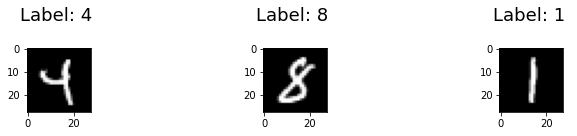

In [47]:
display_images()

In [48]:
from torch import nn

In [49]:
class model(nn.Module):
  def __init__(self):
    super(model,self).__init__()
    self.c1 = nn.Conv2d(in_channels=1,out_channels = 16,kernel_size=(3,3),stride=[1],padding=0)
    

SyntaxError: ignored